#### Please switch to env: `tflow`

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib

from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight")

<img src="percep.png">

In [12]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4       #small random weights
        training = (eta is not None) and (epochs is not None)
        #we can call the Perceptron class without giving any parameters if we don't want it to train but use one of its methods
        if training:
            #printing initial weights only when training otherwise not
            print(f"initial weights before training: \n{self.weights}")      
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)                 #product of weights time the inputs
    
    def activation_function(self, z):
        return np.where(z>0, 1, 0)                     #where z>0 return 1 otherwise return 0 (step function)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]        #concatenating our x with bias
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)            #predicted value
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat                      #true-predicted
            print(f"error :\n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs} is \n{self.weights}")
            print("##"*10)
    
    def predict(self, X):                                        #X is input provided for prediction purpose
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]            
        z = self._z_outcome(X_with_bias, self.weights)           #the updated weights after all epochs
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\n total loss: {total_loss}\n")
        return total_loss
    
    #before writing the model in a file we need to create a directory first
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)      #exist_ok=True so that if directory already present then overwrite it
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            #if model_dir not provided then creates a directory with name 'model'
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)

In [33]:
np.random.seed(2)
wt = np.random.randn(3) * 1e-4
print(wt.shape)      #it is a 1-D array
wt  

(3,)


array([-4.16757847e-05, -5.62668272e-06, -2.13619610e-04])

In [31]:
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [37]:
print(len(X))
-np.ones((len(X), 1))

4


array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [34]:
#concatenating the X with column vector of negative ones(bias).
inp = np.c_[X, -np.ones((len(X), 1))]
inp

array([[ 0.,  0., -1.],
       [ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 1.,  1., -1.]])

In [35]:
#If `a` is an N-D array and `b` is a 1-D array, it is a sum product over the last axis of `a` and `b`.
#though wt is 1-D we treat it as 3*1 matrix for the dot operation
np.dot(inp, wt)      #inp(4*3)*wt(3*1) = result(4*1)

array([0.00021362, 0.00020799, 0.00017194, 0.00016632])

In [13]:
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    return X, y

In [14]:
#AND gate
AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y" :[0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [18]:
len(X)

4

In [17]:
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [15]:
X, y  = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)

_ = model_and.total_loss()

initial weights before training: 
[ 6.17222395e-05 -4.72893634e-05 -1.80150478e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error :
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10 is 
[-0.09993828 -0.10004729  0.29981985]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error :
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10 is 
[ 6.17222395e-05 -4.72893634e-05  1.99819850e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error :
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10 is 
[0.10006172 0.09995271 0.09981985]
####################
--------------------
for epoch >> 3
-------------------

Saving the and model in some folder

In [42]:
model_and.save(filename="and.model")

Loading the saved model by calling the Perceptron function without any parameters eta or epoch, so that it doesn't train again the already trained model, we call the load method by providing file path.

In [43]:
reload_model_and = Perceptron().load(filepath="model/and.model")

In [45]:
reload_model_and.predict(X=[[0,1]])

array([0])

In [46]:
reload_model_and.predict(X=[[1,1]])

array([1])

## OR Gate

In [38]:
#OR gate
OR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y" :[0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [39]:
X, y  = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

initial weights before training: 
[ 1.64027081e-04 -1.79343559e-04 -8.41747366e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 0 1 1]
error :
0   -1
1    1
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10 is 
[ 1.64027081e-04  9.98206564e-02 -8.41747366e-05]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error :
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10 is 
[0.00016403 0.09982066 0.09991583]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 1]
error :
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10 is 
[ 0.10016403  0.19982066 -0.10008417]
####################
--------------------
for epoch >> 3
-------------------

## XOR Gate

In [40]:
#XOR gate
XOR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y" :[0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [41]:
X, y  = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X, y)

_ = model_xor.total_loss()

initial weights before training: 
[ 5.02881417e-05 -1.24528809e-04 -1.05795222e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 0 1 1]
error :
0   -1
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10 is 
[-0.09994971 -0.00012453  0.0998942 ]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error :
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10 is 
[ 5.02881417e-05  9.98754712e-02 -1.00105795e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error :
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 3/10 is 
[-0.09994971 -0.00012453  0.0998942 ]
####################
--------------------
for epoch >> 3
----------------

#### The total loss is never becoming zero for XOR gate.

Because perceptron works only for linear dataset or linearly seperable dataset and not on non-linear data.

In [ ]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

In [47]:
def save_plot(df, model, filename="plot.png", plot_dir = "plots"):
    
    def _create_base_plot(df):                 #creating a scatter plot of data given to dataframe
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)     #building x-axis or horizontal line
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)     #building y-axis or vertical line
        
        figure = plt.gcf()                                #get current figure
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values                               #to get array values
        x1 = X[:,0]                                #all the rows and 0th column
        x2 = X[:,1]                                #all the rows and 1st col
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        #create decision boundaries using meshgrid
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), #resolution means at what range you want to restrict graph
                               np.arange(x2_min, x2_max, resolution)) 
        
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)      #ravel to flatten the matrix into single array
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())              #x-limit
        plt.ylim(xx2.min(), xx2.max())              #y-limit
        
        plt.plot()                                  #to plot the graph in same jupyter nb
    
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

### Segregating the two classes

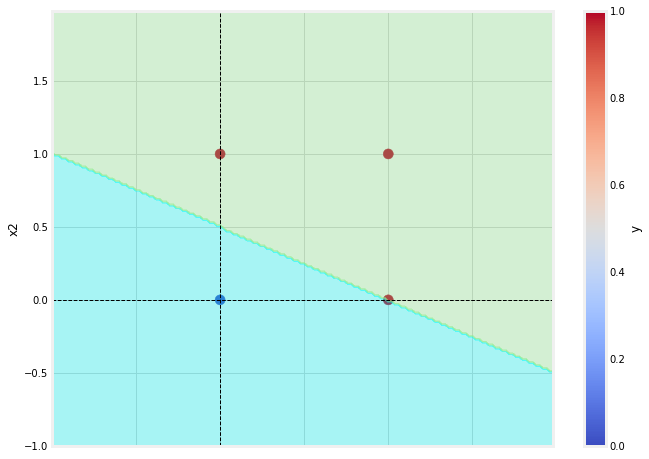

In [48]:
save_plot(df_OR, model_or, filename="or.png")

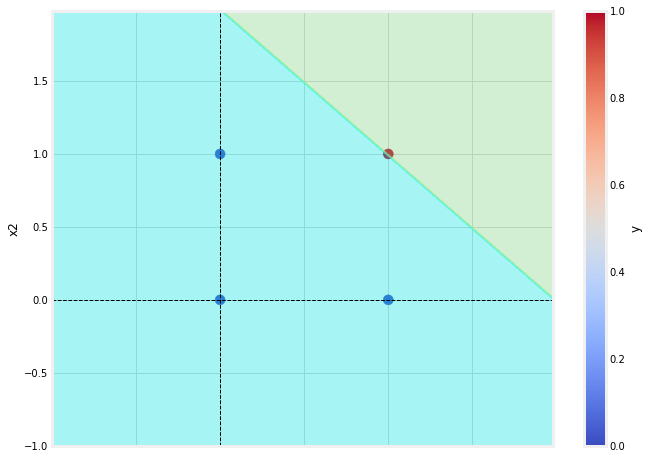

In [49]:
save_plot(df_AND, model_and, filename="and.png")

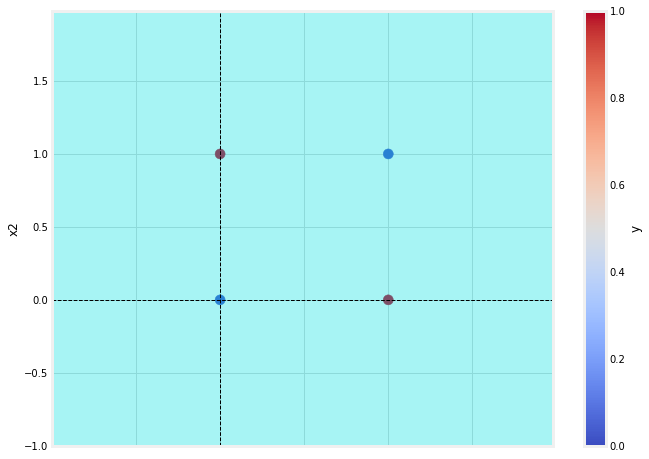

In [50]:
save_plot(df_XOR, model_xor, filename="xor.png")

It cannot make a boundary in case of XOR, because by drawing a single line it will not be able to bifurcate b/w the two classes. This is because they are not linearly seperable. We can either draw an ellipse or hyperbola which can segregate the two classes.
**You have to implement the multi-layer perceptron or ANN.**